# A Viz Showing The Ballon d'Or votings by players and the vote count recieved by each player for the respective position

In [1]:
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce
import os

df = pd.read_csv('Balon d\'Or 2019 Stats - Sheet1.csv')
df = df.dropna()

In [2]:
df.head()

,Country,1,2,3,4,5
1,Albania,Ronaldo,Van Dijk,Messi,Alisson,Salah
2,Algeria,Mane,Messi,Mahrez,Van Dijk,Aguero
4,Andorra,Messi,Salah,Mbappe,De Jong,Ronaldo
5,Angola,Van Dijk,Ronaldo,Messi,Salah,Mane
6,Argentina,Messi,Ronaldo,Aguero,Van Dijk,Benzema


In [3]:
df.rename(columns ={'1':'FirstChoice','2':'SecondChoice','3':'ThirdChoice','4':'FourthChoice','5':'FifthChoice'}, inplace = True)

In [4]:
df.FirstChoice.unique()

array(['Ronaldo', 'Mane ', 'Messi ', 'Van Dijk ', 'Ronaldo ', 'Van Dijk',
       'Salah ', 'Mane', 'Messi', 'Alisson ', 'Lewandowski ', 'Mbappe ',
       'Alexander-Arnold '], dtype=object)

In [5]:
df['FirstChoice'] = df.FirstChoice.str.strip()
df['SecondChoice'] = df.SecondChoice.str.strip()
df['ThirdChoice'] = df.ThirdChoice.str.strip()
df['FourthChoice'] = df.FourthChoice.str.strip()
df['FifthChoice'] = df.FifthChoice.str.strip()

In [6]:
df.head()

,Country,FirstChoice,SecondChoice,ThirdChoice,FourthChoice,FifthChoice
1,Albania,Ronaldo,Van Dijk,Messi,Alisson,Salah
2,Algeria,Mane,Messi,Mahrez,Van Dijk,Aguero
4,Andorra,Messi,Salah,Mbappe,De Jong,Ronaldo
5,Angola,Van Dijk,Ronaldo,Messi,Salah,Mane
6,Argentina,Messi,Ronaldo,Aguero,Van Dijk,Benzema


In [7]:
unique_player = set()
unique_player.update(df.FirstChoice.unique())
unique_player.update(df.SecondChoice.unique())
unique_player.update(df.ThirdChoice.unique())
unique_player.update(df.FourthChoice.unique())
unique_player.update(df.FifthChoice.unique())

In [9]:
df_agg = pd.DataFrame(list(unique_player),columns=['Players'])#

df_agg['First'] = ''
df_agg['Second'] = ''
df_agg['Third'] = ''
df_agg['Fourth'] = ''
df_agg['Fifth'] = ''


In [10]:
for i in unique_player:
    df_agg['First'][df_agg.Players == i] = df[df.FirstChoice == i].count()[0]
    df_agg['Second'][df_agg.Players == i] = df[df.SecondChoice == i].count()[0]
    df_agg['Third'][df_agg.Players == i] = df[df.ThirdChoice == i].count()[0]
    df_agg['Fourth'][df_agg.Players == i] = df[df.FourthChoice == i].count()[0]
    df_agg['Fifth'][df_agg.Players == i] = df[df.FifthChoice == i].count()[0]

In [11]:
df_agg.head()

,Players,First,Second,Third,Fourth,Fifth
0,Tadic,0,0,0,2,1
1,Sterling,0,0,2,7,10
2,Griezmann,0,0,1,2,2
3,Mbappe,2,4,6,13,16
4,Koulibaly,0,0,0,1,0


In [12]:
plot = df_agg.melt('Players',var_name='for hue', value_name='value')

In [13]:
plot.head()

,Players,for hue,value
0,Tadic,First,0
1,Sterling,First,0
2,Griezmann,First,0
3,Mbappe,First,2
4,Koulibaly,First,0


Text(0.5, 0, 'Players')

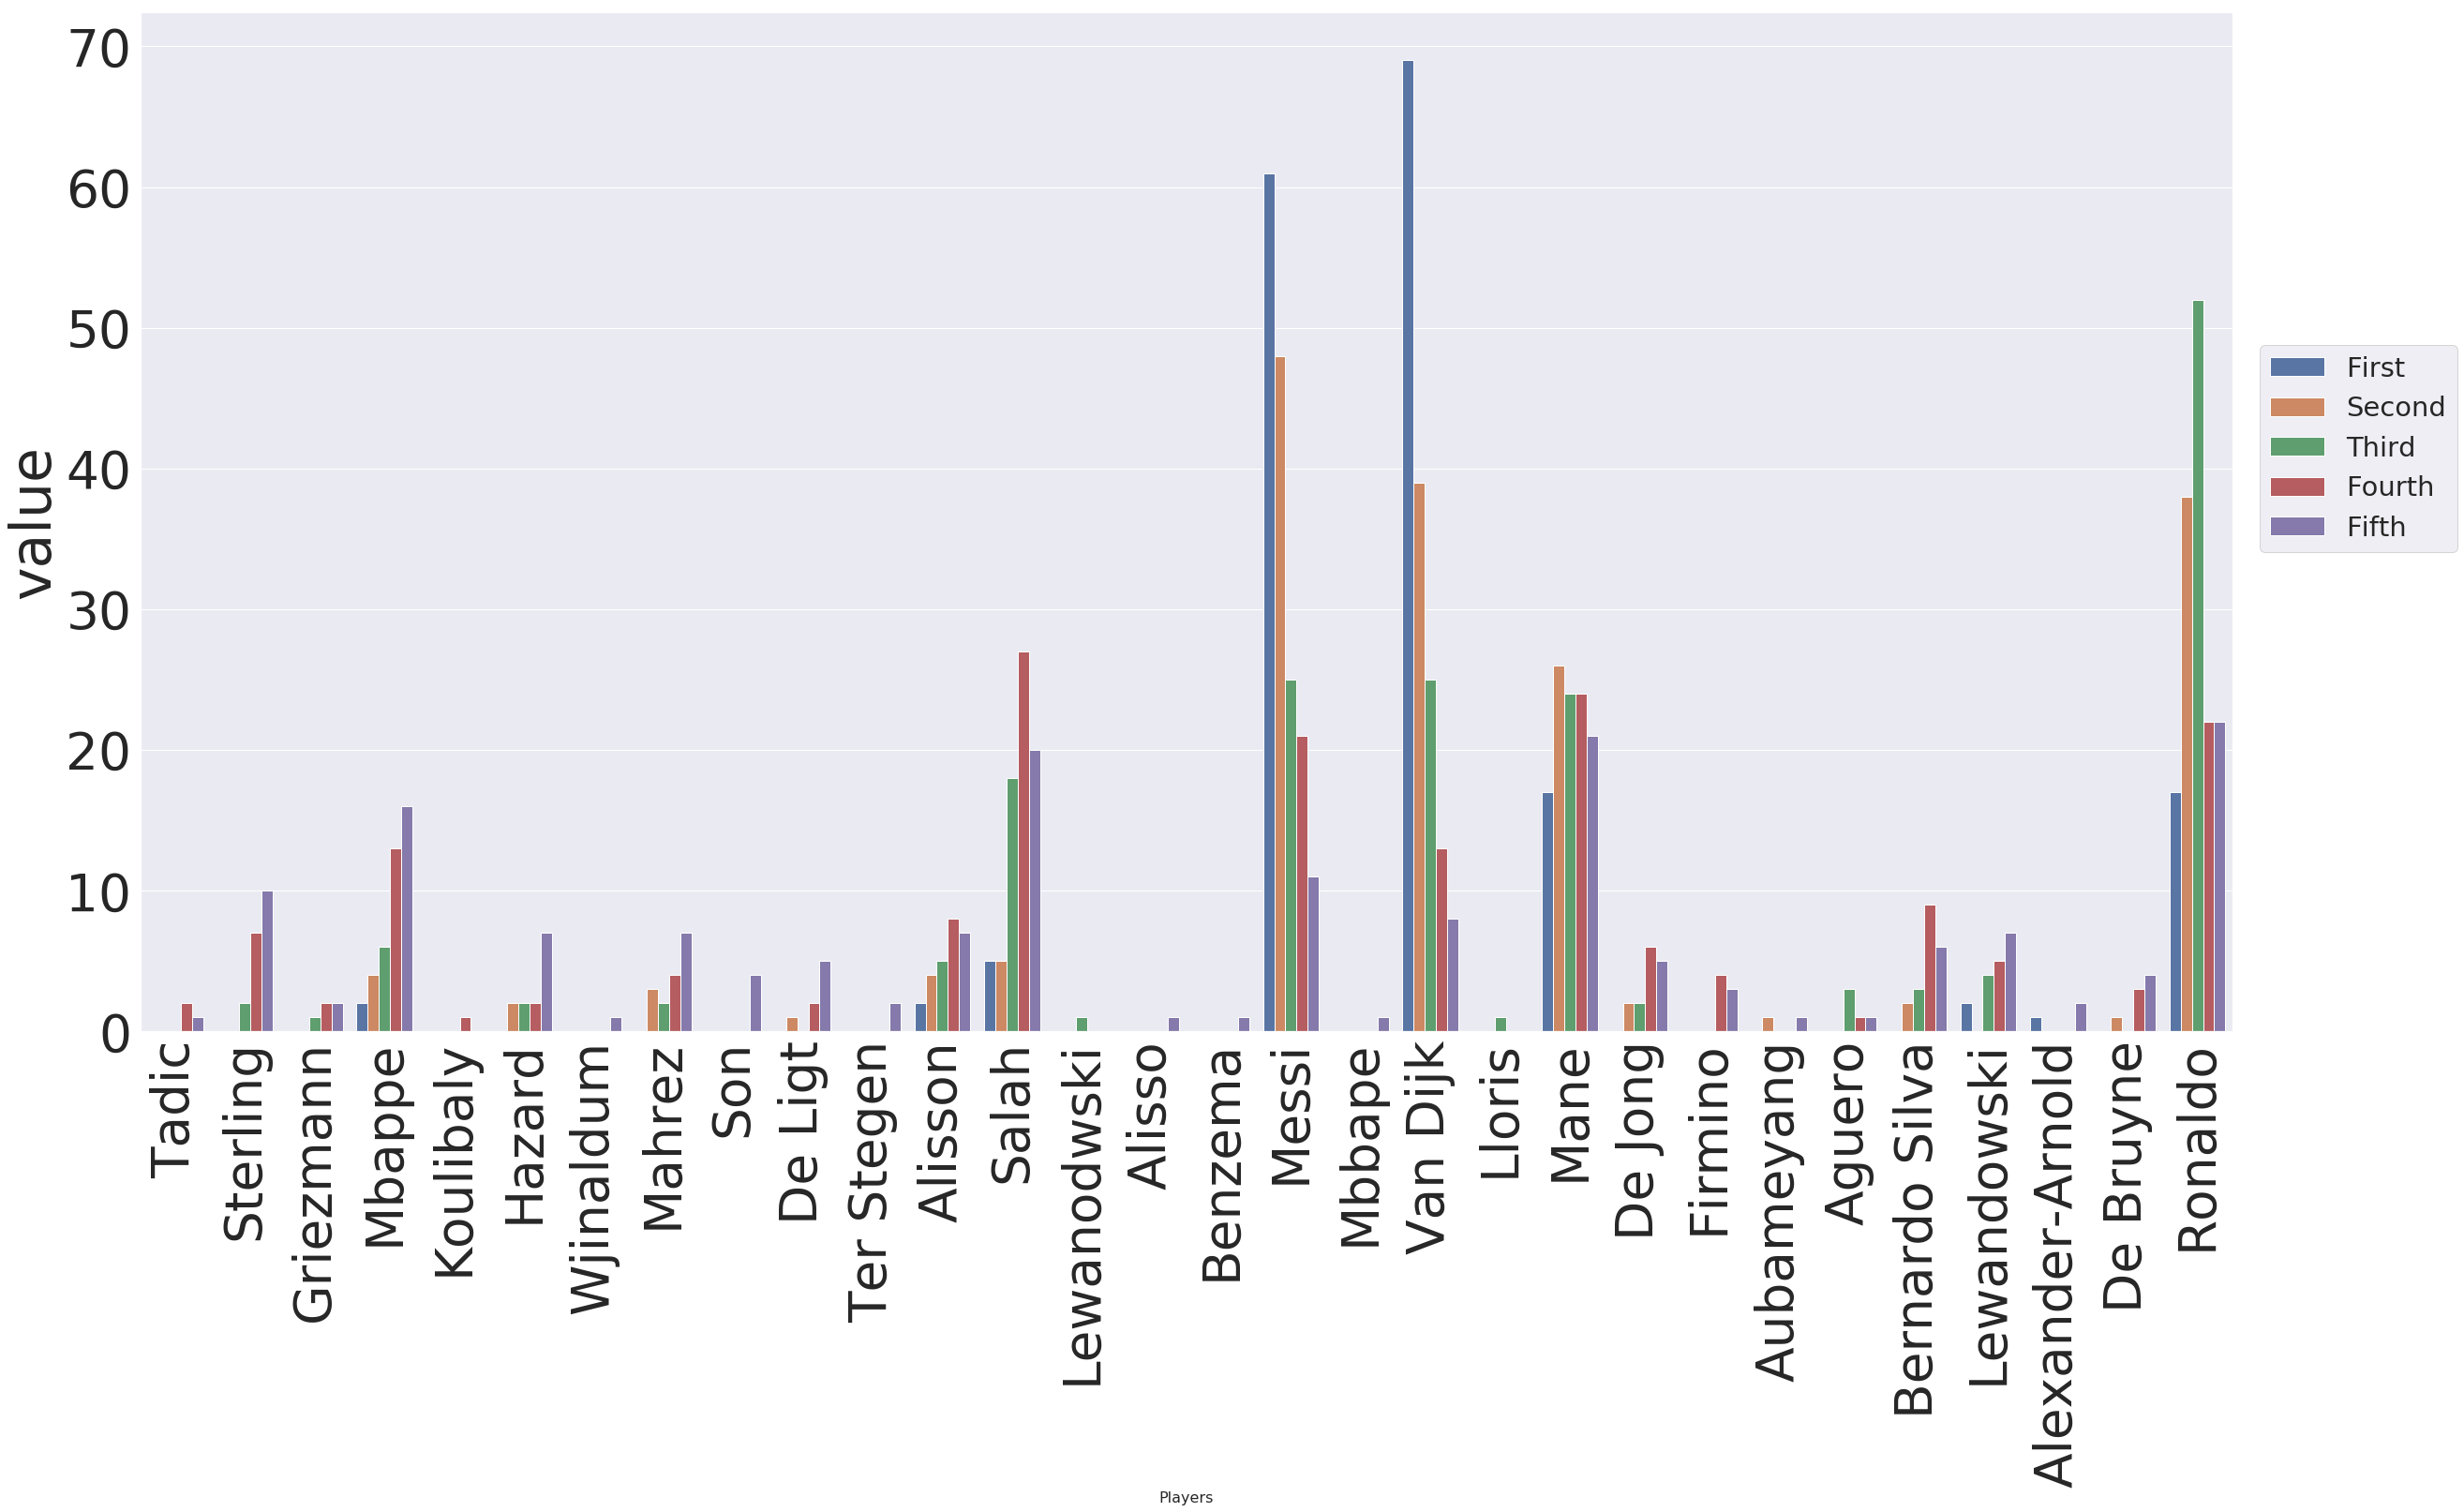

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
bg = "#181818"
a4_dims = (40 ,20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={ 'grid.color': '#5c5b5b','grid.linestyle': ' ','axes.edgecolor': '#000000','axes.facecolor':bg, 'figure.facecolor':bg,'ytick.color':'white','xtick.color':'white' ,'axes.labelcolor': 'white','text.color': 'white'})
plt.xticks(rotation=90)
sns.set(font_scale = 5)
ax = sns.barplot(x="Players", y="value", hue="for hue", data=plot)
plt.legend(scatterpoints=1,
           bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1.,
           ncol=1,
           fontsize=29)
plt.xlabel('Players', fontsize=16)
#plt.ylabel('Vote Count', fontsize=16)